In [16]:
# Start by importing some useful libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import os

In [4]:
# Next read in the csv file using pandas and check the contents
df = pd.read_csv('airline-safety.csv')
df.head(8)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7


In [5]:
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [8]:
# Lets explor our data to understand what we are dealing with and see if we need to do some cleaning. 

def describe_data(df):
    print("Data Types:")
    print(df.info())
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Describe Data")
    print(df.describe())
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("Summarized Data")
    print(df.describe(include=['O']))
describe_data(df)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB
None
Rows and Columns:
(56, 8)
Column Names:
Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')
Describe Data
       avail_seat_km_per_week  incidents_85_99  

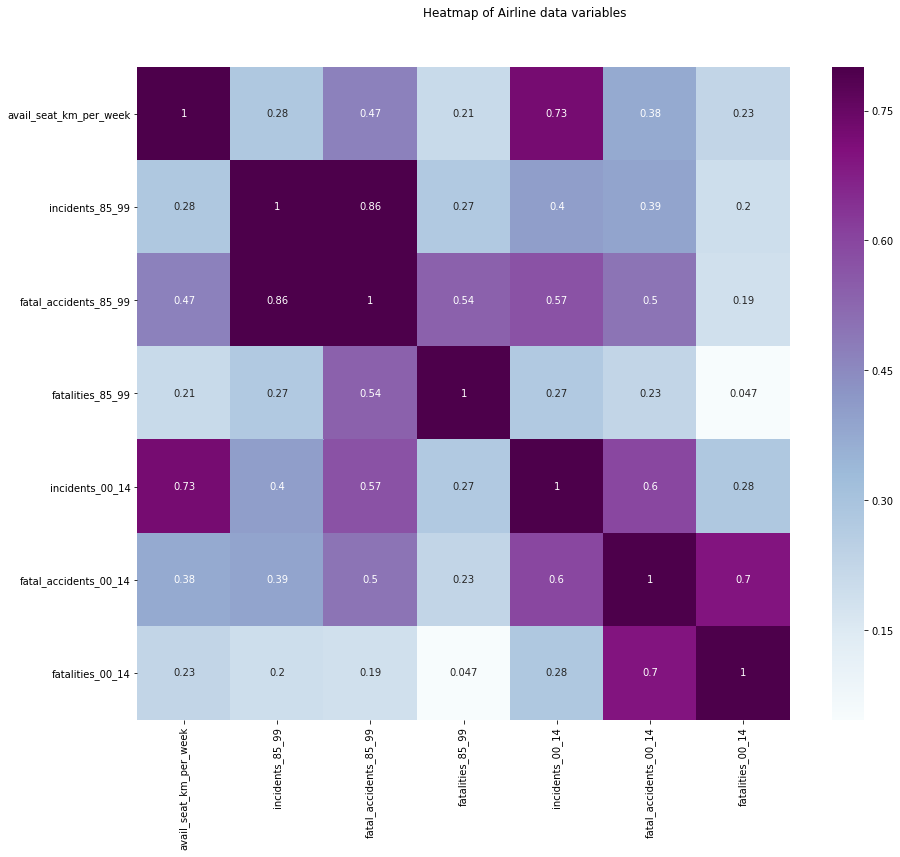

In [9]:
#Lets  use a heat map to visualize the correlation between numerical variables. The variables with darker color means their correlation is higher 
%matplotlib inline
matrix = df.corr()
fig, axes = plt.subplots(figsize=(15,12))
plt.suptitle('Heatmap of Airline data variables',  y=0.95)
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True) ;

In [ ]:
# # We can see that higher positive correlation exists between incidents from 85 to 99 and total accidents in that period with hight correlation of 0.86. 
# same thing ios observed betwwen incedents from 2000 to 2014 and acciudents in that period but with a smaller correlation of 0.6 
#Indeed correlation does not mean causation, but this is a good observation to keep in mind  

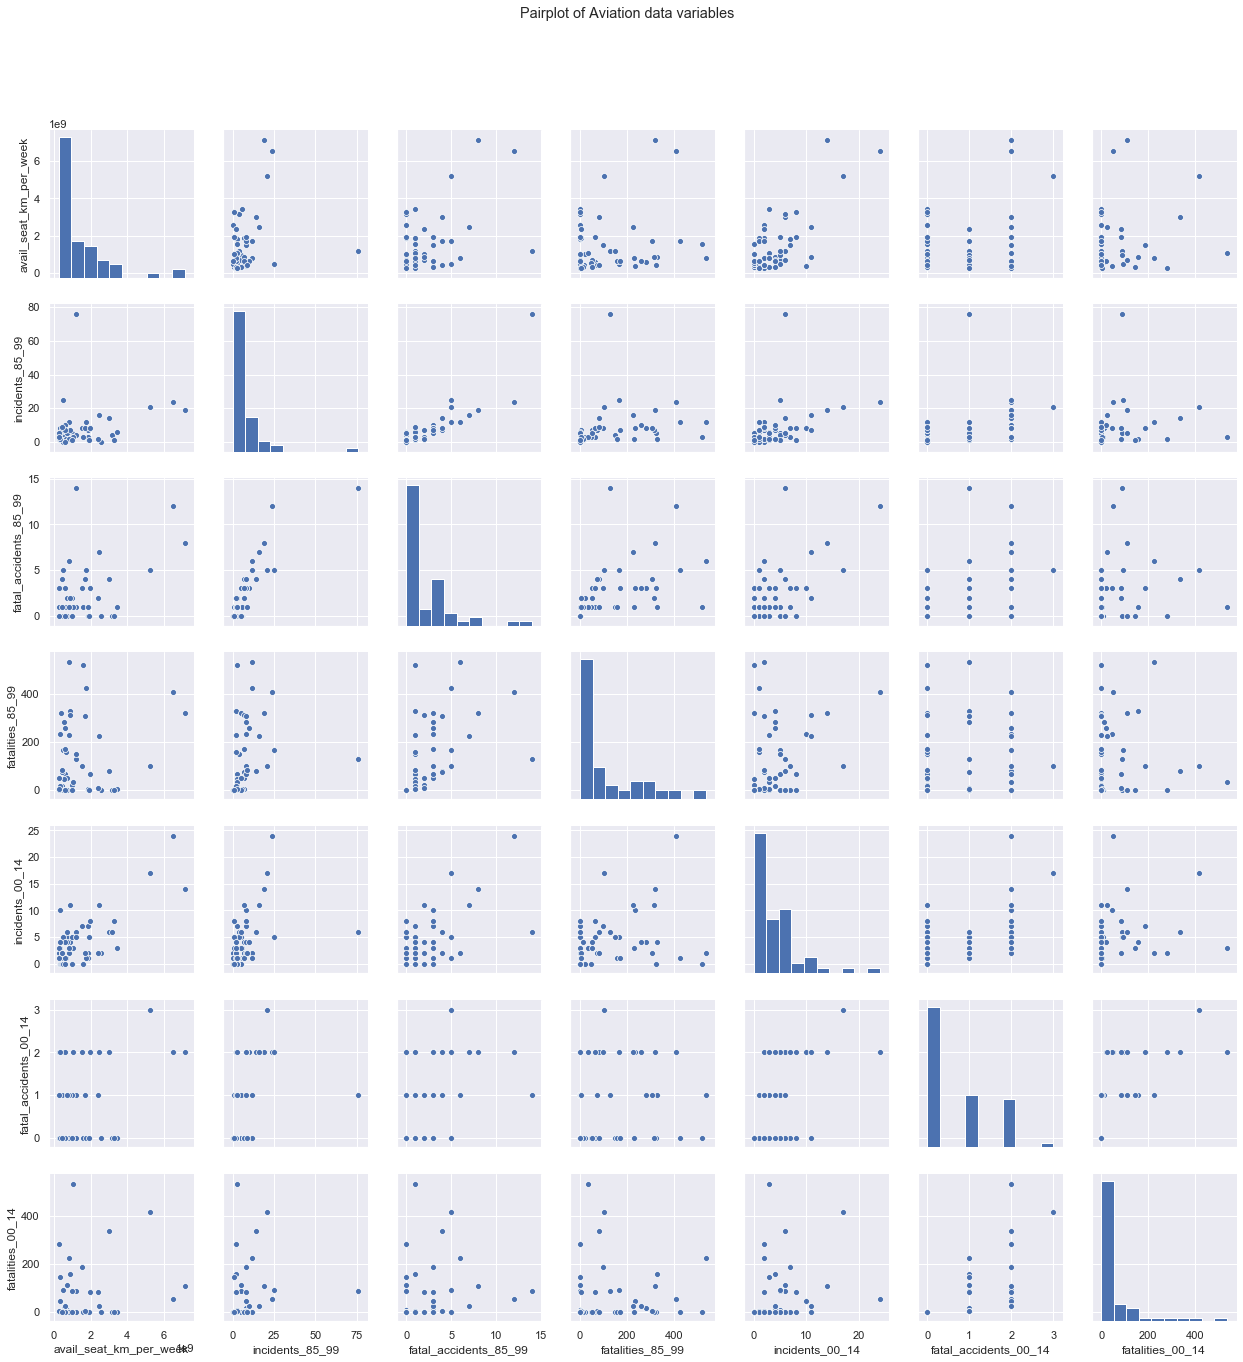

In [28]:
# We will plot pairs plot which will allows us to see both distribution of single variables and relationships between two variables. 
#This will make it easy to see the trends for follow-up analysis.

sns.pairplot(df)
plt.suptitle('Pairplot of Aviation data variables',  y=1.08)
plt.show();



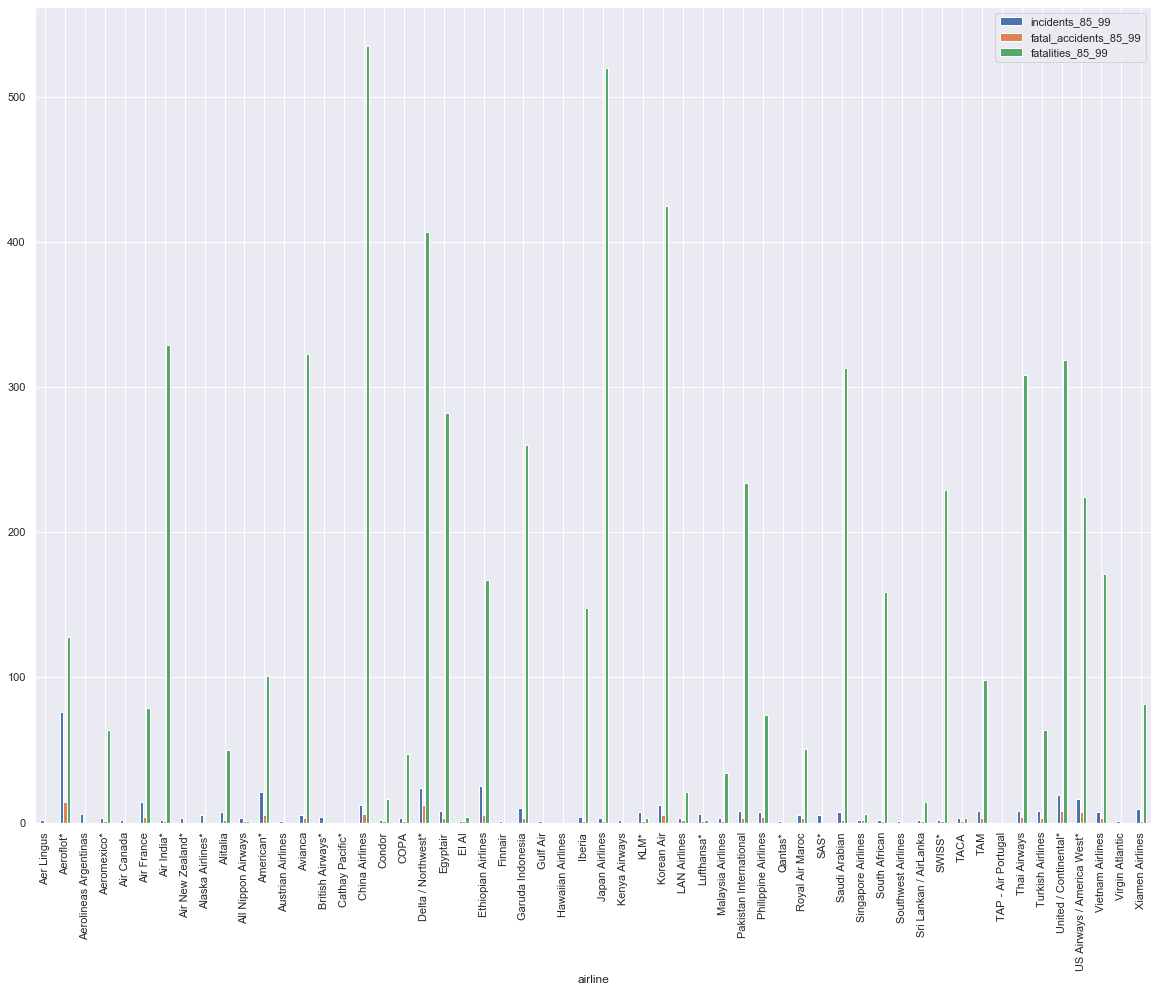

In [29]:
#  Lets peresnt the 3 major variables by airline from 85 to 33 and then from 2000 to 2014

df.plot(x = 'airline',y=['incidents_85_99','fatal_accidents_85_99','fatalities_85_99'],kind='bar',figsize=(20,15));
plt.show()

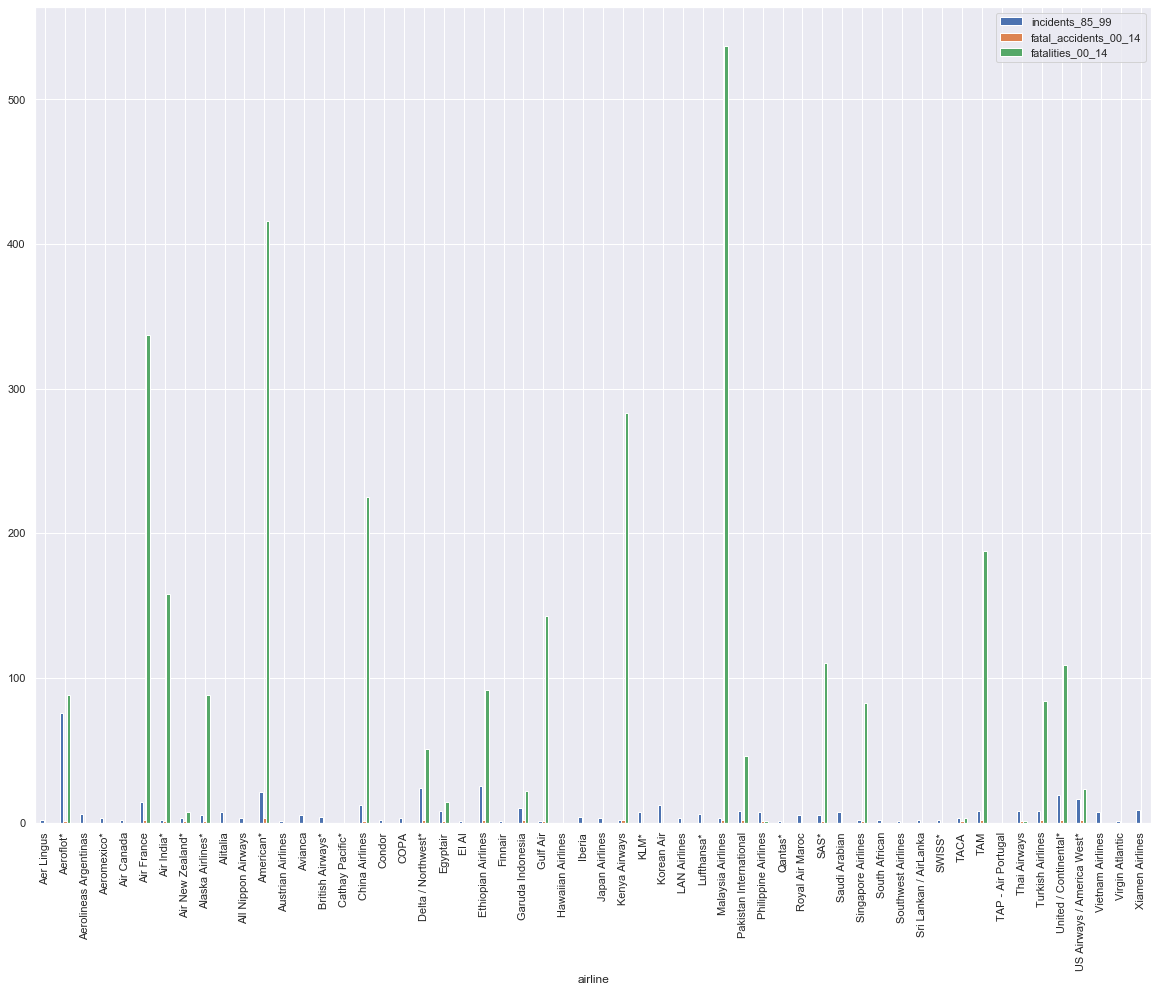

In [30]:
df.plot(x = 'airline',y=['incidents_85_99','fatal_accidents_00_14','fatalities_00_14'],kind='bar',figsize=(20,15));
plt.show()

In [ ]:
# My next step is to look at the differences between the two time ranges. For this, I first store all of the column data in individual lists. 
#This comparison reveals a lot - both time periods represent 14 years, but the 00-14 time period would have seen far more flights since air travel has increased significantly in more recent years; 
# unfortunately we don't have any numbers in this data set on this though. However, we can see that in the 00-14 time period fatalities are 50% lower than in the 85-99 time period. 
# There is an even bigger difference in the number of fatal accidents, which dropped 70% from 122 to 37. Incidents are also down by nearly 50%.

In [10]:
# Store all data in lists
airlines = df.airline.tolist()
avail_seat_km_per_week = df.avail_seat_km_per_week.tolist()
incidents_85_99 = df.incidents_85_99.tolist()
fatal_accidents_85_99 = df.fatal_accidents_85_99.tolist()
fatalities_85_99 = df.fatalities_85_99.tolist()
incidents_00_14 = df.incidents_00_14.tolist()
fatal_accidents_00_14 = df.fatal_accidents_00_14.tolist()
fatalities_00_14 = df.fatalities_00_14.tolist()

# Print out total fatalities, fatal accidents and incidents in both time ranges
print("Fatalities 85-99: ", sum(fatalities_85_99))
print("Fatalities 00-14: ", sum(fatalities_00_14))
print("Fatal accidents 85-99: ", sum(fatal_accidents_85_99))
print("Fatal accidents 00-14: ", sum(fatal_accidents_00_14))
print("Incidents 85-99: ", sum(incidents_85_99))
print("Incidents 00-14: ", sum(incidents_00_14))

Fatalities 85-99:  6295
Fatalities 00-14:  3109
Fatal accidents 85-99:  122
Fatal accidents 00-14:  37
Incidents 85-99:  402
Incidents 00-14:  231


In [ ]:
#Now looking into the data in more detail, it's interesting to plot the number of fatalities for each airline, starting with the 85-99 time range. 
# Here I decided to remove airlines with 0 fatalities (to make the plot a bit cleaner and easier to view) and I sorted by number of fatalities.

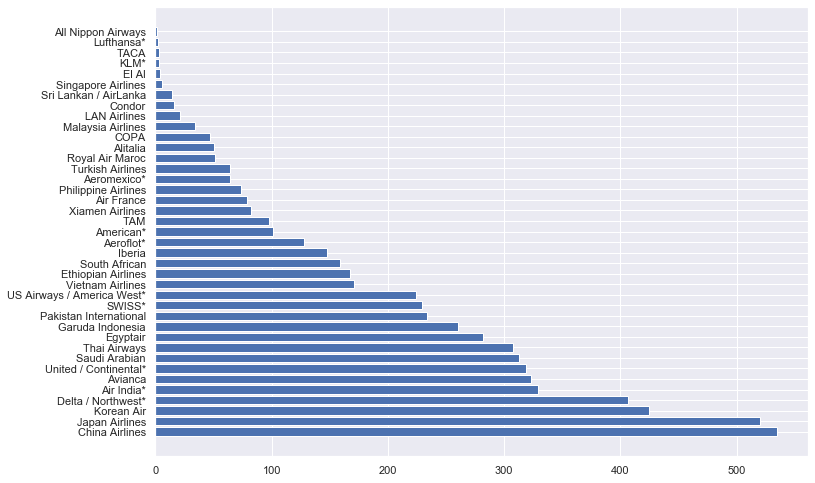

In [18]:
# Create plot of airlines and fatalities, for both time ranges, sorted in descending order
sns.set_color_codes("pastel")
df_fatalities_85_99_descending = df.sort_values('fatalities_85_99', ascending=False)
df_fatalities_00_14_descending = df.sort_values('fatalities_00_14', ascending=False)
fatalities_85_99_descending = df_fatalities_85_99_descending.fatalities_85_99.tolist()
airline_85_99_descending = df_fatalities_85_99_descending.airline.tolist()
i = 0
fatalities_85_99_descending_nonzero = []
airline_85_99_descending_nonzero = []
while i < len(fatalities_85_99_descending):
    if fatalities_85_99_descending[i] != 0:
        fatalities_85_99_descending_nonzero.append(fatalities_85_99_descending[i])
        airline_85_99_descending_nonzero.append(airline_85_99_descending[i])
    i = i + 1
fatalities_00_14_descending = df_fatalities_00_14_descending.fatalities_00_14.tolist()
airline_00_14_descending = df_fatalities_00_14_descending.airline.tolist()
i = 0
fatalities_00_14_descending_nonzero = []
airline_00_14_descending_nonzero = []
while i < len(fatalities_00_14_descending):
    if fatalities_00_14_descending[i] != 0:
        fatalities_00_14_descending_nonzero.append(fatalities_00_14_descending[i])
        airline_00_14_descending_nonzero.append(airline_00_14_descending[i])
    i = i + 1
plt.barh(airline_85_99_descending_nonzero,fatalities_85_99_descending_nonzero)
sns.set(rc={'figure.figsize':(100,80)})


In [ ]:
# The top three airlines are China Airlines, Japan Airlines, and Korean Air. Now let's do the same, but for the 00-14 time range.

<BarContainer object of 24 artists>

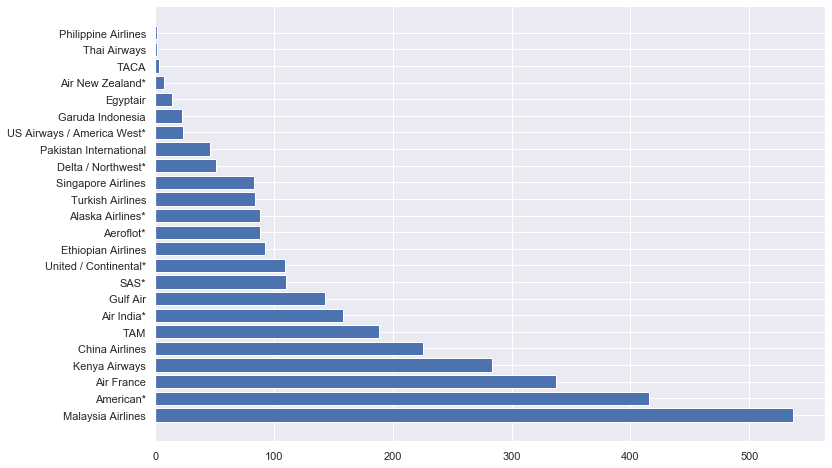

In [22]:
plt.barh(airline_00_14_descending_nonzero,fatalities_00_14_descending_nonzero)


In [ ]:
# The top 3 are now Malaysia Airlines, American, and Air France. Malaysia Airlines being top of the list is no surprise, given the two major accidents in recent years (MH17 was downed over Ukraine and MH370 disappeared,  both in 2014).

In [ ]:
# While this is interesting data, it would be even better if we also had the context of the number of available seat km per week for each airline as well, since airlines flying more km per week are more likely to have more incidents and fatalities.

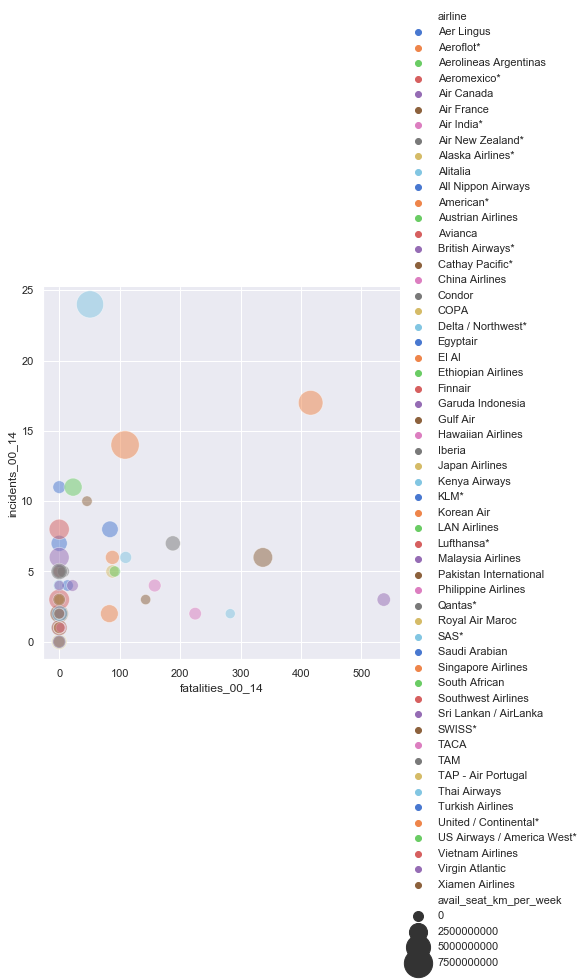

In [26]:
sns.relplot(x="fatalities_00_14", y="incidents_00_14", hue="airline", size="avail_seat_km_per_week",
            sizes=(100, 800), alpha=.5, palette="muted",
            height=6, data=df)


# From this plot we can see that Malaysia Airlines flies fewer seat km per week than other airlines, despite having the highest number of fatalities in the 00-14 time period.